<a href="https://colab.research.google.com/github/JADukeAIPI/AIPIProject/blob/main/EDA_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
from datetime import datetime, timedelta, date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap




In [13]:
##clone the repo and import the data files
!git clone https://github.com/JADukeAIPI/AIPIProject.git


fatal: destination path 'AIPIProject' already exists and is not an empty directory.


In [3]:
#getting data. Note that this could come through the SQL query on the database
#but still in process, so using the archived csv files for this

#get events data
all_events_df = pd.read_csv('all_events_through0315.csv')
large_events_df = pd.read_csv('large_events.csv')

#get kaggle cars data
car_rental_data_df = pd.read_csv('CarRentalDataV1.csv')

#get rental car data from the API
all_cars_df = pd.read_csv('AllCarsAPI.csv')
luxury_cars_df = pd.read_csv('LuxuryAPI.csv') 


In [80]:
atlanta_car_rental_data_df = car_rental_data_df[car_rental_data_df['location.city']=='Atlanta']
atlanta_car_rental_data_df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
38,GASOLINE,5.00,52,44,Atlanta,US,33.640717,-84.427580,GA,6025007,144,Land Rover,Range Rover,suv,2016,Atlanta
42,GASOLINE,5.00,2,2,Atlanta,US,33.891295,-84.453929,GA,12796797,200,BMW,7 Series,car,2018,Atlanta
43,GASOLINE,4.93,18,14,Atlanta,US,33.903877,-84.277873,GA,53029,98,Mercedes-benz,C-Class,car,2019,Atlanta
45,GASOLINE,4.89,94,80,Atlanta,US,33.927403,-84.342767,GA,511103,150,Porsche,Panamera,car,2011,Atlanta
49,ELECTRIC,5.00,15,11,Atlanta,US,33.746442,-84.372238,GA,2253859,134,Tesla,Model 3,car,2018,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,GASOLINE,5.00,3,3,Atlanta,US,33.605798,-84.501351,GA,15622497,48,Jeep,Patriot,suv,2015,Atlanta
223,NaN,5.00,10,8,Atlanta,US,33.753282,-84.466572,GA,1886829,299,Land Rover,Range Rover,suv,2020,Atlanta
225,GASOLINE,4.91,36,34,Atlanta,US,33.811329,-84.375881,GA,3659271,99,BMW,4 Series Gran Coupe,car,2016,Atlanta
229,GASOLINE,4.70,100,81,Atlanta,US,33.772969,-84.419985,GA,7221030,50,Buick,LaCrosse,car,2016,Atlanta


In [81]:

all_cars_df

,Unnamed: 0,Vehicle_id,Vehicle_Name,Category,Transmission,Base_Price,Price,Date_Pickup,Date_Dropoff
0,85,644881578,Ford Mustang Cabrio,Standard,Automatic,244.83,252.90,2022-11-18,2022-11-19
1,92,646119363,Ford Mustang Cabrio,Standard,Automatic,231.37,238.99,2022-11-18,2022-11-19
2,81,644901178,Ford Mustang Cabrio,Standard,Automatic,226.77,234.24,2022-11-18,2022-11-19
3,79,644861498,Ford Mustang Cabrio,Standard,Automatic,214.75,221.83,2022-11-18,2022-11-19
4,87,646151248,Ford Mustang Cabrio,Standard,Automatic,213.43,220.46,2022-11-18,2022-11-19
...,...,...,...,...,...,...,...,...,...
33471,3,636464748,Hyundai Elantra,Intermediate,Automatic,114.29,118.06,2023-03-02,2023-03-03
33472,6,631553748,Toyota Corolla,Intermediate,Automatic,114.28,118.05,2023-03-02,2023-03-03
33473,1,631938668,Toyota Corolla,Intermediate,Automatic,112.25,115.95,2023-03-02,2023-03-03
33474,4,585207153,Nissan Sentra,Intermediate,Automatic,112.25,115.95,2023-03-02,2023-03-03


In [4]:
luxury_cars_df

,Unnamed: 0,Vehicle_id,Vehicle_Name,Category,Transmission,Base_Price,Price,Date_Pickup,Date_Dropoff
0,227,644881573,Cadillac XTS,Luxury,Automatic,150.09,155.52,2022-11-20,2022-11-21
1,223,636479888,Cadillac XTS,Luxury,Automatic,143.49,148.68,2022-11-20,2022-11-21
2,194,646119413,Cadillac XTS,Luxury,Automatic,137.69,142.67,2022-11-20,2022-11-21
3,208,644901168,Cadillac XTS,Luxury,Automatic,132.64,137.43,2022-11-20,2022-11-21
4,230,636492688,Cadillac XTS,Luxury,Automatic,126.12,130.68,2022-11-20,2022-11-21
...,...,...,...,...,...,...,...,...,...
2599,87,636464758,Cadillac XTS,Luxury,Automatic,151.73,157.22,2023-03-02,2023-03-03
2600,97,585207183,Chrysler 300,Luxury,Automatic,151.17,156.63,2023-03-02,2023-03-03
2601,57,631938698,Buick LaCrosse,Luxury,Automatic,151.17,156.63,2023-03-02,2023-03-03
2602,70,631553768,Lincoln Continental,Luxury,Automatic,149.49,154.89,2023-03-02,2023-03-03


In [8]:
#cleaning our archived rental data for next 3 months by getting rid of the old index column, 
#and changing the current index to the Date_Pickup changed to datetime

def clean_cars(df):
  df1=df.copy()
  df1.drop('Unnamed: 0', axis=1, inplace=True)
  df1.set_index('Date_Pickup', inplace=True)

  df1.index = pd.to_datetime(df1.index, format=('%Y-%m-%d'))
  #removing dropoff date since arbitrarily chosen to be 1 day after pickup date
  df1.drop('Date_Dropoff', axis=1, inplace = True)

  return(df1)
 

In [9]:
#luxury_cars_df.columns

clean_luxury_cars_df = clean_cars(luxury_cars_df)
clean_all_cars_df = clean_cars(all_cars_df)

In [10]:
#get total counts of all cars in dataframes for each day
luxury_count = clean_luxury_cars_df.groupby(clean_luxury_cars_df.index)['Vehicle_id'].count()
all_car_count = clean_all_cars_df.groupby(clean_all_cars_df.index)['Vehicle_id'].count()

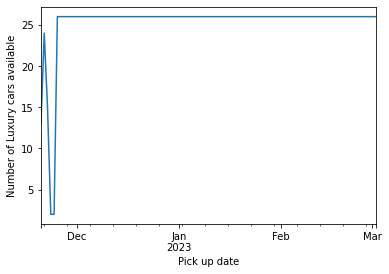

In [11]:
luxury_count.plot()
plt.xlabel("Pick up date")
plt.ylabel("Number of Luxury cars available")
plt.show()

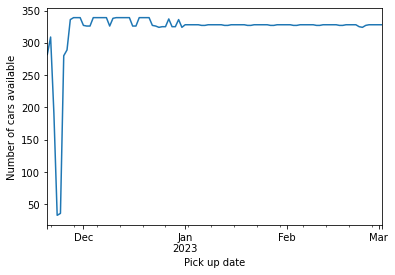

In [12]:
all_car_count.plot()
plt.xlabel("Pick up date")
plt.ylabel("Number of cars available")
plt.show()

In [96]:
all_car_count.idxmin(), all_car_count.min(), all_car_count.max(), luxury_count.min(), luxury_count.max()

(Timestamp('2022-11-24 00:00:00'), 26, 339, 2, 26)

A couple things to note:
1. There is low inventory for both call cars and luxury cars on the dates around 2022-11-24 due to Thanksgiving holiday. 
2. For luxury cars there is fairly flat inventory after late november, at about 26 cars.
3. For all cars, there is some variation in the inventory until shortly after january 1st due to rentals, which appears to have some weekly seasonality. The maximum inventory for all cars is 339 cars, with the mininum being 26 cars at Thanksgiving.
4. For all and luxury cars, there is also a relatively low inventory of cars in the next ady or two, which suggests that the majority of cars may be reserved close to when they are needed rather than several weeks away; this seems particularly true for luxury cars. 

In [97]:
##look at prices over time for all and luxury cars

car_prices = clean_all_cars_df.groupby([clean_all_cars_df.index, 'Vehicle_Name'])['Price'].mean()
car_prices

Date_Pickup  Vehicle_Name      
2022-11-18   Cadillac XTS          152.823333
             Cadillac XTS          150.390000
             Chevrolet Tahoe       149.440000
             Dodge Challenger      115.440000
             Ford Expedition       122.060000
                                      ...    
2023-03-02   Toyota Tacoma         171.070000
             Volkswagen Atlas      242.680000
             Volkswagen Jetta      187.384286
             Volkswagen Jetta      166.288235
             Wild Card             222.456667
Name: Price, Length: 7314, dtype: float64

In [103]:
car_prices.loc['2022-11-18'], car_prices.loc['2022-11-24']

(Date_Pickup  Vehicle_Name        
 2022-11-18   Cadillac XTS            152.823333
              Cadillac XTS            150.390000
              Chevrolet Tahoe         149.440000
              Dodge Challenger        115.440000
              Ford Expedition         122.060000
              Ford F150               136.090000
              Ford Fusion             113.150000
              Ford Fusion              82.168333
              Ford Mustang  Cabrio    229.587500
              Ford Mustang Cabrio     215.822500
              Hyundai Elantra          88.270000
              Hyundai Santa Fe        119.860000
              Mitsubishi Mirage        82.996250
              Nissan Frontier          94.018333
              Nissan Maxima           137.266667
              Nissan Maxima           134.770000
              Nissan Pathfinder       106.767500
              Nissan Rogue            113.242500
              Nissan Versa             82.996250
              Toyota RAV4         

As a snapshot, here are rental rates for various cars in inventory (averaged by car type) for two dates: today and Thanksgiving. One, the shift is towards more high end cars available on thanksgiving, but also for cars that are available on both days (e.g., Volkswagen Jetter, Nissan Versa), the prices are much higher on Thanksgiving due to the high demand. 

Let's explore the prices over time for 3 vehicles: Nissan Pathfinder, BMW 5 Series, and Cadillac XTS

In [13]:
Pathfinder = clean_all_cars_df[clean_all_cars_df['Vehicle_Name']=='Nissan Pathfinder']['Price']
BMW5 = clean_all_cars_df[clean_all_cars_df['Vehicle_Name']=='BMW 5 Series']['Price']
Caddy = clean_all_cars_df[clean_all_cars_df['Vehicle_Name']=='Cadillac XTS']['Price']


<AxesSubplot:title={'center':'Pathfinder Prices'}, xlabel='Date_Pickup'>

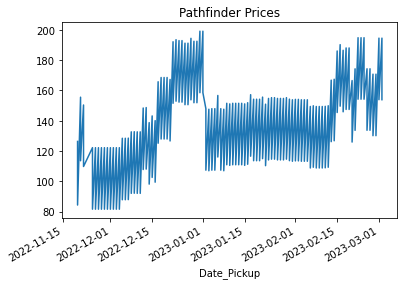

In [14]:
Pathfinder.plot(title='Pathfinder Prices')

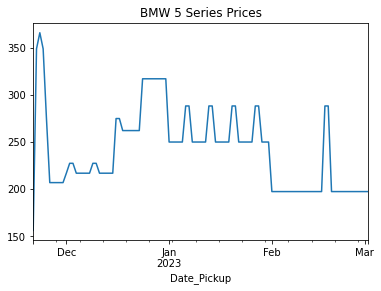

In [131]:
BMW5.plot(title='BMW 5 Series Prices')

<AxesSubplot:title={'center':'Cadillac XTS Prices'}, xlabel='Date_Pickup'>

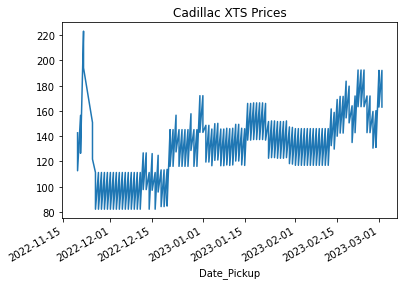

In [15]:
Caddy.plot(title = 'Cadillac XTS Prices')

In [137]:
BMW5.describe()


count    102.000000
mean     241.542059
std       43.156775
min      156.300000
25%      197.420000
50%      249.910000
75%      262.030000
max      365.650000
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


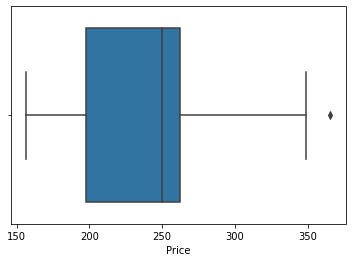

In [141]:
sns.boxplot(BMW5).set_title='BMW 5 Series Price Distribution'

A couple things to note:
1. High demand pricing for all cars over Thanksgiving and then between/around Christmas to New Years. 
2. There is some weekly seasonality as well, most notable for the BMW (corresponding to the weekends).
3. BMW 5 series prices are skewed (left skewed) but with more high price outliers (ie, there are price spikes)
4. There are high prices for all the cars in the latter half of February into early March...we will look at the events to see if there is an explanation. 

In [23]:
def clean_events(df):
  df1=df.copy()
  df1.drop('Unnamed: 0', axis=1, inplace=True)
  df1.set_index('Dates', inplace=True)

  df1.index = pd.to_datetime(df1.index, format=('%Y-%m-%d'))

  return(df1)

In [24]:
#events webscraped from Discover Atlanta (see WebScrapingAtlantEvents.ipynb).
#Large events are those occuring at Mercedes-Benz Stadium and State Farm Arena. 
large_events_clean = clean_events(large_events_df)
large_events_clean

,Event,Location,Description
Dates,,,
2022-11-19,Atlanta Hawks vs. Toronto Raptors,State Farm Arena,Come cheer on the Hawks as they take on the To...
2022-11-20,Atlanta Falcons vs. Chicago Bears – Nov. 20,Mercedes-Benz Stadium,Come watch the Atlanta Falcons take on the Chi...
2022-11-22,ATEEZ – The Fellowship: Break The Wall Tour,State Farm Arena,K-pop giants ATEEZ have announced a monumental...
2022-11-23,Atlanta Hawks vs. Sacramento Kings,State Farm Arena,Come cheer on the Hawks as they take on the Sa...
2022-11-27,Atlanta Hawks vs. Miami Heat,State Farm Arena,Come cheer on the Hawks as they take on the Mi...
2022-12-01,Rod Wave – Beautiful Mind Tour,State Farm Arena,Platinum-selling rapper Rod Wave has announced...
2022-12-02,Atlanta Hawks vs. Denver Nuggets,State Farm Arena,Come cheer on the Hawks!
2022-12-02,Disney On Ice: Frozen & Encanto,State Farm Arena,"For the first time, Disney On Ice invites fami..."
2022-12-03,2022 SEC Football Championship,Mercedes-Benz Stadium,The 2022 SEC Championship Game is on course to...


No large events in these venues are identified in late February to explain the increased demand at this time. We will look at the more complete list of all events during this time frame. 

In [25]:
all_events_clean = clean_events(all_events_df)
display(all_events_clean)

,Event,Location,Description
Dates,,,
2022-11-20,CFHOF Honors 2022 Inductees with New Exhibit,Chick-fil-A College Football Hall of Fame,NaN
2022-11-20,Ancient Engraved Gemstones,Michael C. Carlos Museum (Emory University),"The exhibition, Making an Impression, the Art ..."
2022-11-20,Cirque Du Soleil – Kurios,Atlantic Station,"Critically acclaimed the world over, KURIOS—Ca..."
2022-11-20,“In Hope for a Better Future” Art Exhibition,Hammonds House Museum,Hammonds House Museum closes out 2022 with a d...
2022-11-20,Spruill Gallery Holiday Artists Market,Spruill Gallery,This well-loved Holiday Artist’s Market kicks ...
...,...,...,...
2023-03-12,"Boris Giltburg, piano",Spivey Hall,Winner of the 2013 Queen Elisabeth Competition...
2023-03-12,Duke Ellington’s Cat,Center For Puppetry Arts,A Musical Giant & his Cool Cat Written and dir...
2023-03-12,Sunday Spiritual Festival,Krishna Life Temple and Monastery,Come and experience the association of practic...


In [26]:
late_feb_events = all_events_clean[all_events_clean.index>'2023-02-10']
with pd.option_context('display.max_rows', 200, 'display.max_columns', 10):
    display(late_feb_events)


,Event,Location,Description
Dates,,,
2023-02-11,Deana Lawson Exhibit,High Museum of Art,"Featuring work made over the past two decades,..."
2023-02-11,Duke Ellington’s Cat,Center For Puppetry Arts,A Musical Giant & his Cool Cat Written and dir...
2023-02-11,WildWoods AGLOW,Fernbank Museum of Natural History,"This all-new, limited-run nighttime experience..."
2023-02-11,Midtown Atlanta Food and Cocktail Tour,Saint Mark United Methodist Church,Indulge in an eclectic array of cuisine & cock...
2023-02-11,Stephen Burks Shelter in Place,High Museum of Art,"In the wake of several global crises, designer..."
2023-02-11,Mavis Staples LIVE at the Rialto,Rialto Center for the Arts at Georgia State Un...,With Opening Act: Lamont Landers Band The Spir...
2023-02-12,Midtown Atlanta Food and Cocktail Tour,Saint Mark United Methodist Church,Indulge in an eclectic array of cuisine & cock...
2023-02-12,WildWoods AGLOW,Fernbank Museum of Natural History,"This all-new, limited-run nighttime experience..."
2023-02-12,Sunday Spiritual Festival,Krishna Life Temple and Monastery,Come and experience the association of practic...


Possibly the increase in demand for this period is due to Duke Ellington's Cat at the Center for Puppetry Arts? Actually, while there are a large number of events, no one thing stands out as a large draw. Of note, the events do not include those held at the Atlanta Convention Center (which hosts Quilt-con in late February). One thing on the list is the Atlanta Marathon in late February, and the US Olympic Trials for the Marathon are being held the day before, so possibly could bring travelers. 

In [27]:
##Lets explore the events by date

large_event_by_dates = large_events_clean.groupby(large_events_clean.index)['Event'].count()
large_event_by_dates

Dates
2022-11-19    1
2022-11-20    1
2022-11-22    1
2022-11-23    1
2022-11-27    1
2022-12-01    1
2022-12-02    2
2022-12-03    1
2022-12-04    2
2022-12-05    1
2022-12-10    1
2022-12-11    1
2022-12-13    1
2022-12-15    1
2022-12-16    1
2022-12-17    1
2022-12-18    1
2022-12-19    1
2022-12-21    1
2022-12-23    1
2022-12-28    1
2022-12-30    1
2022-12-31    1
2023-01-01    1
2023-01-11    1
2023-01-16    1
2023-02-03    2
2023-02-04    1
2023-02-07    2
Name: Event, dtype: int64

not very interesting to plot, as the number ranges from 0-2 large events per day.

In [28]:
all_events_by_dates = all_events_clean.groupby(all_events_clean.index)['Event'].count()
all_events_by_dates

Dates
2022-11-20    57
2022-11-21    42
2022-11-22    43
2022-11-23    45
2022-11-24    45
              ..
2023-03-09     2
2023-03-10     3
2023-03-11     4
2023-03-12     5
2023-03-14     1
Name: Event, Length: 114, dtype: int64

<AxesSubplot:title={'center':'All Events'}, xlabel='Dates'>

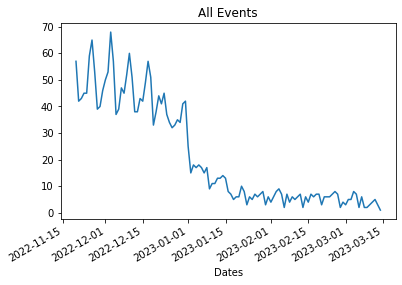

In [29]:
all_events_by_dates.plot(title='All Events')


There is weekly seasonality (with more events on the weekends) and the event list is not as populated for dates far in the future on the website. 

One way to incorporate the events and holidays would be a heuristic model; given the lack of historical data, we could place best guesses into a demand score as below. A couple things to note: capacity of the mercedes benz stadium is 95K but record NFL attendance at the site up to 115K, capacity of the state farm arena is about 17K. Capacity of Center of Puppetry Arts is about 200. For starters, will score an event on the location only, but could in future use description as well. 


In [16]:

#demand score from holidays/events

def demand_score(date, df, holiday_list): #where df is a dataframe containing events and holiday list a list of high travel holidays and date as datetime in form 'YYYY-MM-DD')
  score = 0
  holiday_multiplier = 100
  venue_scores = {'Mercedes-Benz Stadium': 50, 'State Farm Arena': 8} 
  #assigning high scores to MBS and SFA; others = 1. we could assign other venues high scores also if appropriate

  df1 = df.copy()
  if date not in (df.index): 
    print('date out of range')
    return 0
  event_list_for_date = df1.loc[date]['Location'].to_list()
  for event in event_list_for_date:
    if event in venue_scores:
      score = score + venue_scores[event]
    else:
      score = score + 1
  score = score + int(date in holiday_list) * holiday_multiplier

  
  return score


In [17]:
holiday_list = ['2022-11-24', '2022-11-25', '2022-11-26', '2022-12-24','2022-12-25', '2022-12-31', '2023-01-01', '2023-01-02']

In [30]:
demand_score('2023-02-03', all_events_clean, holiday_list)

22

date out of range


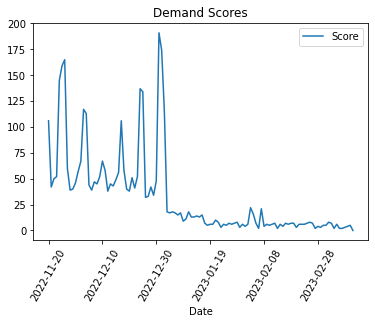

In [31]:
#plot demand scores over the next couple months:
demand_score_dict = {}
for i in range(1,115):
  date = datetime.today()+timedelta(days=i)
  date = date.strftime('%Y-%m-%d')
  
  demand_score_dict[date]=demand_score(date, all_events_clean, holiday_list)

demand_df = pd.DataFrame(demand_score_dict.items(), columns=['Date', 'Score']).set_index('Date')
demand_df.plot(title="Demand Scores")
plt.xticks(rotation = 60)
plt.show()

This is still fairly crude...certainly could add a factor for different holidays depending on how big of a travel day based on historical factors. Also could use historical factors to see which types or locations of events have impact (several of the small venue ones likely have no impact at all). 

Looking at the range of values, we could stratify demand scores into a couple buckets: high (above 125), medium (above 75), and low (below 75). 

In [227]:
# this is what we want: demand_level_dict = {range(0-74): 'Low', range(75-124): 'Medium', range(125-250): 'High'}
def setdict(d, keys, value):
    for k in keys:
        d[k] = value

demand_level_dict = {}
setdict(demand_level_dict, range(0, 74), 'Low')
setdict(demand_level_dict, range(75, 124), 'Medium')
setdict(demand_level_dict, range(125,250), 'High')

#sanity check
print(demand_level_dict[24], demand_level_dict[130])

Low High


In [228]:
demand_df['Level']=demand_df['Score'].apply(lambda x: demand_level_dict[x])
demand_df

,Score,Level
Date,,
2022-11-20,106,Medium
2022-11-21,42,Low
2022-11-22,50,Low
2022-11-23,52,Low
2022-11-24,145,High
...,...,...
2023-03-09,2,Low
2023-03-10,3,Low
2023-03-11,4,Low


In [229]:
demand_df.to_csv('demand_frame.csv')
demand_df.to_pickle('demand_frame.pkl')


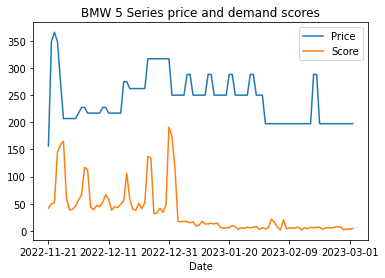

In [252]:
#lets plot the demand score versus the price of the bmw 5 series
#plot_bmw_demand_df = pd.merge(demand_df, BMW5, on=index)

BMW5_df = pd.DataFrame(BMW5)
BMW5_df.index = BMW5_df.index.rename('Date')
BMW5_df.index = BMW5_df.index.strftime('%Y-%m-%d')
merge_car_demand = pd.merge(BMW5_df, demand_df, on='Date', how = 'left')
merge_car_demand.plot(title='BMW 5 Series price and demand scores')

We see that in the near term, the BMW 5 Series prices reflect a weekly seasonality (higher on the weekends) and high holiday effects on thanksgiving and near New Years. The demand curve shows we may be underestimating the effects of the holidays and overestimating the event effects on the weekends. In the far term, the pricing scheme still reflects the weekly seasonality but the demand data is somewhat underpopulated and hence underestimating the demand. On review of the previous plot for the events versus dates, the information in the far future becomes sparse. Also, there may be large venue events that are not yet scheduled (football playoff games--haven't been following the Falcons, so not sure if they will be in playoffs).  

In [251]:
## on to try to model the inventory/rentals and price for the bmw 5 series

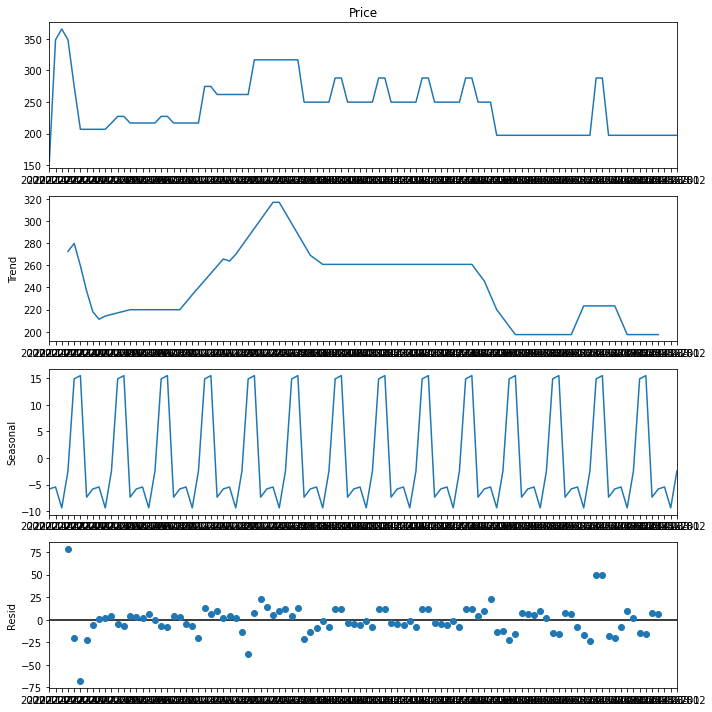

In [268]:
decomposition = sm.tsa.seasonal_decompose(BMW5_df['Price'], model = 'additive',period=7) # Period =7 because seasonality is on weekly basis
plt.rcParams['figure.figsize'] = [10,10]
decomposition.plot()

plt.show()

Weekly seasonality confirmed by visual inspection. Outliers near the holidays and in mid-late Feb as noted earlier. 

In [324]:

def line_model(df, col=['Price']):
  linmodel_df = df.copy()
  linmodel_df.index = pd.to_datetime(linmodel_df.index)

  #going to change index to an integer number of days
  linmodel_df['Days'] = (linmodel_df.index-linmodel_df.index.min()).days

  linear_model = LinearRegression()
  linear_model.fit(X=linmodel_df['Days'].values.reshape(-1,1), y=linmodel_df[col])

  # Get in-sample predictions (on the training set) for the days in the month
  linear_preds = linear_model.predict(linmodel_df['Days'].values.reshape(-1,1))

  # Add predictions and residuals to the dataframe
  linmodel_df['Preds'] = linear_preds
  linmodel_df['resids']=linmodel_df[col]-linmodel_df['Preds']

  # Calculate the model performance statistics
  mse = np.sum(linmodel_df['resids']**2,axis=0)/linmodel_df.shape[0]
  r2 = 1 - np.sum((linmodel_df['resids'])**2)/np.sum((linmodel_df[col]-np.mean(linmodel_df[col]))**2)
  #r2 = 1 - mse/np.var(linmodel_df['Count']) # Alternative way to calculate r2

  # Display the model and performance metrics
  print('The fitted model is: y = {:.3f}x + {:.3f}'.format(linear_model.coef_[0], linear_model.intercept_))
  print('The simple linear model has R^2={:.3f} and MSE={:.3f}'.format(r2,mse))

  # Plot the data and the predictions
  plt.figure(figsize=(10,5))
  plt.scatter(x=linmodel_df['Days'], y=linmodel_df[col])
  plt.plot(linmodel_df['Days'], linmodel_df['Preds'],color='red')
  plt.ylabel(col)
  plt.show()

  return linmodel_df, mse, r2




The fitted model is: y = -0.512x + 267.381
The simple linear model has R^2=0.123 and MSE=1617.284


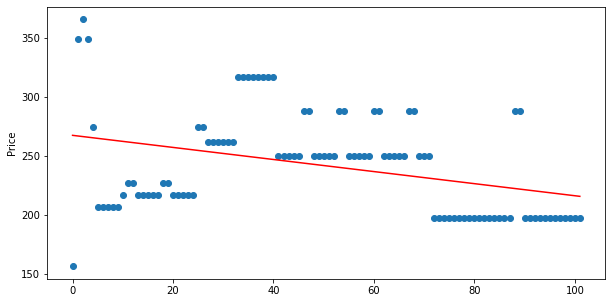

In [325]:
bmw_line, bmw_mse, bmw_r2 = line_model(BMW5_df, 'Price')

As we can see by the low R2 value, not a good model to predict the price data using a linear regression given the seasonality and high demand pricing.

We can look at the entire fleet of cars for pricing (just using the average price of all the cars each day):


In [287]:
#creat dataframe suitable for the linear model for all cars mean price
avg_car_prices = clean_all_cars_df.groupby(clean_all_cars_df.index)['Price'].mean()
avg_car_prices_df = pd.DataFrame(avg_car_prices)
avg_car_prices_df.index = avg_car_prices_df.index.rename('Date')
avg_car_prices_df.index = avg_car_prices_df.index.strftime('%Y-%m-%d')
avg_car_prices_df

,Price
Date,
2022-11-18,117.890962
2022-11-19,105.638038
2022-11-20,122.218292
2022-11-21,178.855155
2022-11-22,175.212320
...,...
2023-02-26,163.942591
2023-02-27,166.069848
2023-02-28,164.018841


The fitted model is: y = 0.436x + 121.823
The simple linear model has R^2=0.304 and MSE=400.382


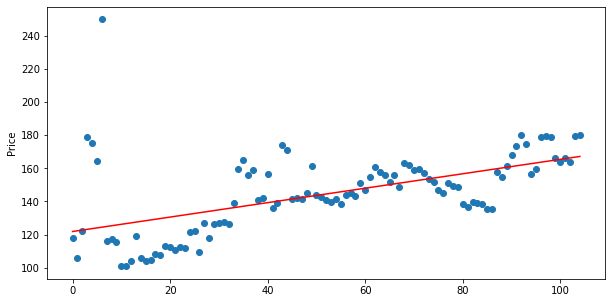

In [331]:
all_car_avg_price_line, all_car_avg_price_mse, all_car_avg_price_r2 = line_model(avg_car_prices_df, 'Price')

This fit is slightly better than that for the BMW 5 Series alone, but still poor. Interestingly the model predicts increase in price over time rather than decrease for the BMW 5 Series. 

In [356]:
##adding features for days of the week and demand score - note sending a df also with #days passed as a feature

def linemodel_dow_demand(df, dem_df, col='Price'):
  df1 = df.copy()
  dem_df.index = pd.to_datetime(dem_df.index)
  #merge_car_demand = pd.merge(BMW5_df, demand_df, on='Date', how = 'left')
  df2 = df1.merge(dem_df, on='Date', how='left')
  #drop rows with na
  df2 = df2.dropna()
  
  df2.index = pd.to_datetime(df2.index)
  df2['Day_of_week'] = df2.index.dayofweek
  df2 = pd.get_dummies(data = df2, columns=['Day_of_week'])

  dow_dem_model = LinearRegression()
  X = df2.drop(labels=col,axis=1)
  y = df2[col]
  dow_dem_model.fit(X, y)

  # Get in-sample predictions (on the training set)
  preds = dow_dem_model.predict(X)

  # Add predictions and residuals to the dataframe
  df2['Preds'] = preds
  df2['resids']=df2[col]-df2['Preds']

  # Calculate the model performance statistics
  mse = np.sum(df2['resids']**2,axis=0)/df2.shape[0]
  r2 = 1 - np.sum((df2['resids'])**2)/np.sum((df2[col]-np.mean(df2[col]))**2)

  # Display the model and performance metrics
  print('The fitted model is:')
  # Get the equation for the model
  coef = dow_dem_model.coef_
  intercept = dow_dem_model.intercept_

  # Print out the equation
  equation = 'y = {:.2f} + '.format(intercept) + ' + '.join(['{:.2f}*{}'.format(coef,var) for coef,var in zip(coef,X.columns)])
  print(equation)

  print('The simple linear model has R^2={:.3f} and MSE={:.3f}'.format(r2,mse))

  # Plot the data and the predictions
  plt.figure(figsize=(10,5))
  plt.scatter(x=df2.index, y=df2[col])
  plt.plot(df2.index, df2['Preds'],color='red')
  plt.xlim((df2.index.min(),df2.index.max()))
  plt.ylabel('Price')
  plt.show()


  return df2, dow_dem_model, mse, r2


In [357]:
#to use the more complicated model with trend, weekly seasonality, and demand info, need to send a df with #of days after start to get the trend
all_car_trend_df = all_car_avg_price_line.drop(columns=['Preds', 'resids'], axis=1)
bmw_trend_df = bmw_line.drop(columns=['Preds', 'resids'], axis=1)

#print(all_car_trend_df.index, bmw_trend_df.index)



The fitted model is:
y = 105.83 + 0.61*Days + 0.20*Score + 0.13*Day_of_week_0 + -1.12*Day_of_week_1 + 3.06*Day_of_week_2 + 9.75*Day_of_week_3 + -0.87*Day_of_week_4 + -5.80*Day_of_week_5 + -5.14*Day_of_week_6
The simple linear model has R^2=0.371 and MSE=355.183


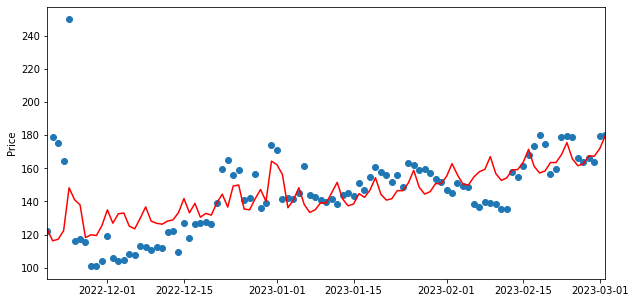

In [358]:
all_car_for_model, avg_daily_pries_dem_model, avg_car_dem_model_mse, avg_car_dem_model_r2 = linemodel_dow_demand(all_car_trend_df, demand_df['Score'], 'Price')

Here, the 'Days' variable is the number of days from 11-18-2022 and the day of the week 0-6 = Monday-Sunday. The R2 value is still not great but model able to capture some of the trend and seasonality. The coefficient for the demand score is fairly low compared with some of the days of the wek, and it seems to partially compensate for or serve as the surrogate for days of the week as the coefficients for saturday and sunday are actually negative.  

The fitted model is:
y = 258.54 + -0.41*Days + 0.11*Score + -13.67*Day_of_week_0 + -0.01*Day_of_week_1 + -2.09*Day_of_week_2 + -2.87*Day_of_week_3 + 15.94*Day_of_week_4 + 12.67*Day_of_week_5 + -9.97*Day_of_week_6
The simple linear model has R^2=0.191 and MSE=1492.257


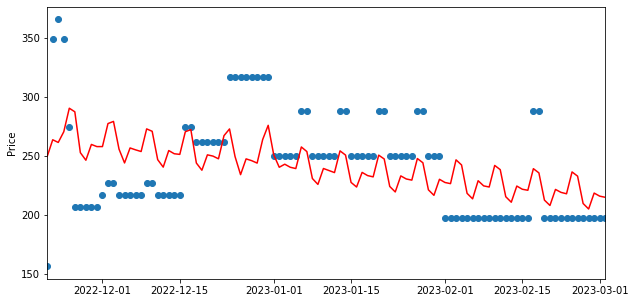

In [352]:
#price model for the BMW 5 series:
bmw5_for_model, bmw5_prices_dem_model, bmw5_dem_model_mse, bmw5_dem_model_r2 = linemodel_dow_demand(bmw_trend_df, demand_df['Score'], 'Price')

This is not a good model for the BMW prices! 

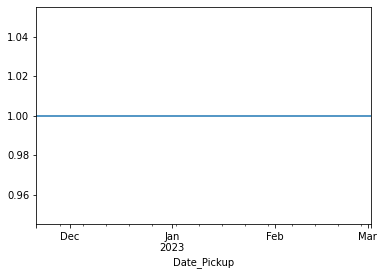

In [260]:
bmw5_inventory = clean_all_cars_df.loc[clean_all_cars_df['Vehicle_Name']=='BMW 5 Series']
bmw5_count = bmw5_inventory.groupby(bmw5_inventory.index)['Vehicle_id'].count()
bmw5_count.plot()

Okay, so there is only 1 BMW 5 Series, and it is always available for the current date range. Let's look at the entire car range again. 

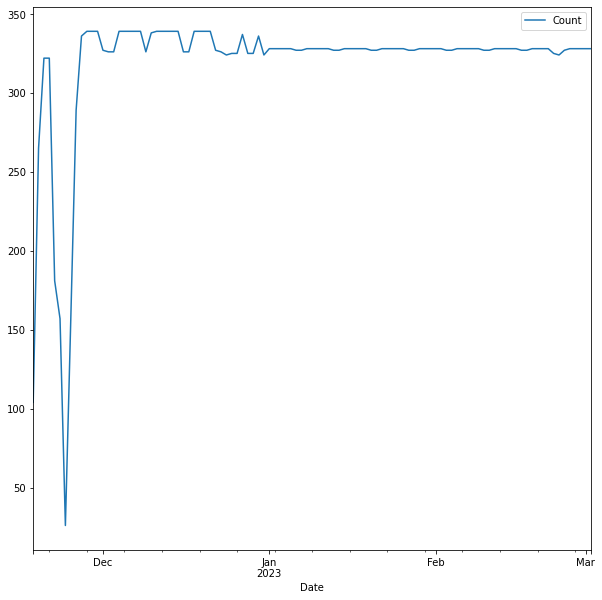

In [413]:
all_car_inventory_df = pd.DataFrame(all_car_count).rename(columns={'Vehicle_id': 'Count'})
all_car_inventory_df.index.rename('Date', inplace=True)
all_car_inventory_df.plot()




The fitted model is: y = 0.492x + 293.227
The simple linear model has R^2=0.106 and MSE=1882.492


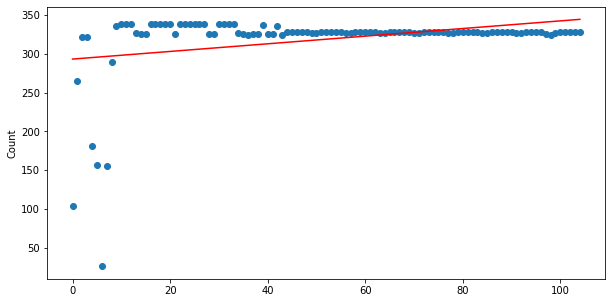

In [414]:
inventory_line, inventory_mse, inventory_r2 = line_model(all_car_inventory_df, 'Count')

In [417]:
inventory_line

,Count,Days,Preds,resids
Date,,,,
2022-11-18,104,0,293.227134,-189.227134
2022-11-19,265,1,293.719286,-28.719286
2022-11-20,322,2,294.211438,27.788562
2022-11-21,322,3,294.703590,27.296410
2022-11-22,181,4,295.195743,-114.195743
...,...,...,...,...
2023-02-26,328,100,342.442353,-14.442353
2023-02-27,328,101,342.934505,-14.934505
2023-02-28,328,102,343.426657,-15.426657


Clearly this is not a good fit overall, but particularly for the near term where the inventory has more variation day to day.

We will try to fit with the model using trend, seasonality, and demand information as we did with the prices.

The fitted model is:
y = 334.57 + 0.01*Days + -0.39*Score + 5.08*Day_of_week_0 + -5.06*Day_of_week_1 + -7.03*Day_of_week_2 + -15.04*Day_of_week_3 + -6.08*Day_of_week_4 + 13.19*Day_of_week_5 + 14.95*Day_of_week_6
The simple linear model has R^2=0.185 and MSE=1355.137


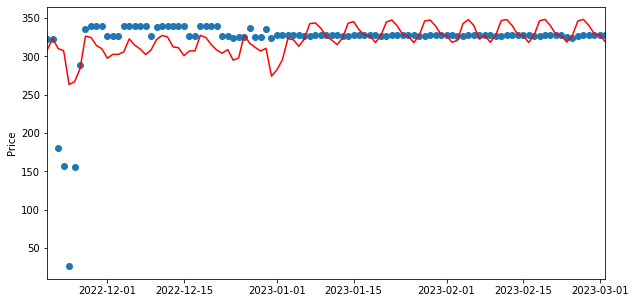

In [418]:
#must first drop the preds and residuals from the dataframe
in_line = inventory_line.drop(['Preds', 'resids'], axis=1)
inventory_model_df, inventory_model, inventory_mse, inventory_r2 = linemodel_dow_demand(in_line, demand_df['Score'], 'Count')

Not a good fit due to the volatility over Thanksgiving and then the lack of information in the far future. 

The fitted model is:
y = 323.65 + 0.65*Days + -0.47*Score + 7.67*Day_of_week_0 + -9.78*Day_of_week_1 + -12.46*Day_of_week_2 + -27.41*Day_of_week_3 + -10.53*Day_of_week_4 + 25.71*Day_of_week_5 + 26.81*Day_of_week_6
The simple linear model has R^2=0.285 and MSE=2075.005


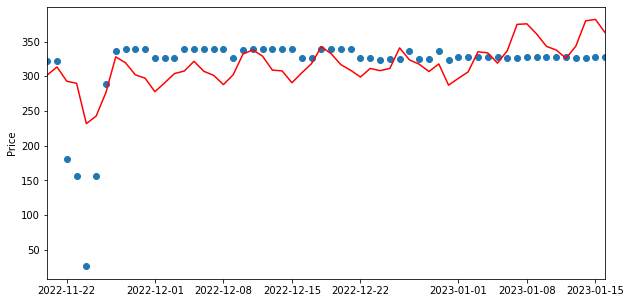

In [432]:
sliced_inv_df = in_line['2022-11-18':'2023-01-16']

sliced_inv_model_df, sliced_inv_model, sliced_inv_mse, sliced_inv_r2 = linemodel_dow_demand(sliced_inv_df, demand_df['Score'], 'Count')

This is minimally better but still not good. Again, Thanksgiving being in the next few days is difficult to balance with the rest of the information further out. And I do not think it is worth breaking down into training and test datasets to predict given what we have seen so far...clearly, having historical data of 1-2 years would be helpful to capture the seasonality and trends (as there is not just weekly seasonality but yearly seasonality as well). 